In [167]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
import pandas as pd

# create a dataframe from scratch using a dictionary
league = pd.DataFrame({
    'club': ['Porto', 'Benfica', 'Sporting',  'Sp. Braga',  'Marítimo',  'V. Guimarães', 'Nacional', 'Gil Vicente', 'Académica', 'Rio Ave', 'P. Ferreira', 'Estoril', 'Moreirense', 'Beira-Mar', 'Olhanense', 'V. Setúbal'],
    'budget': [100, 70, 36, 15, 6, 5.5, 4, 3.6, 3.4, 3.4, 2.5, 2.5, 2.5, 1.8, 1.4, 1.2],
    'position': [1,2,7,4,10,9,8,13,11,6,3,5,15,16,14,12]
})

league

,club,budget,position
0,Porto,100.0,1
1,Benfica,70.0,2
2,Sporting,36.0,7
3,Sp. Braga,15.0,4
4,Marítimo,6.0,10
5,V. Guimarães,5.5,9
6,Nacional,4.0,8
7,Gil Vicente,3.6,13
8,Académica,3.4,11
9,Rio Ave,3.4,6


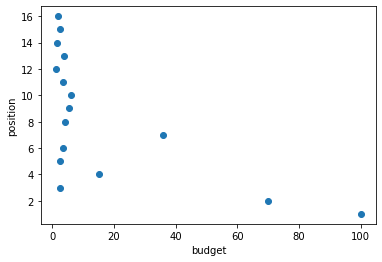

In [168]:
ax=plt.axes()
ax.scatter(league.budget,league.position)
ax.set(xlabel='budget')
ax.set(ylabel='position'); # this semicolon supresses the output of this command. Try without

## How does the model approximate the true function?

### Calculate the residuals

In [186]:
# Using x and y as shorthands
# Convert the df columns to numpy arrays

x=np.array(league.budget)
X=x[:,np.newaxis] # newaxis gives X the shape of a matrix. Try without
y=np.array(league.position)

model = LinearRegression(fit_intercept=True)
model.fit(X,y)

# Pretty print model
beta1=model.coef_[0]
beta0=model.intercept_

print('position =',beta0,'+',beta1,'*budget')

position = 10.174389249860445 + -0.103517109728621 *budget


In [187]:
ypred=model.predict(X)
residuals=y-ypred
residuals

array([ 1.17732172, -0.92819157,  0.5522267 , -4.6216326 ,  0.44671341,
       -0.60504515, -1.76032081,  3.19827235,  1.17756892, -3.82243108,
       -6.91559648, -4.91559648,  5.08440352,  6.01194155,  3.9705347 ,
        1.94983128])

In [171]:
# Residual Sum of Squares

sum(residuals**2)

207.35317559374502

In [188]:
quartiles = np.percentile(residuals, [25, 50, 75])
maxr=max(residuals)
minr=min(residuals)

# Printing with format (%). We define number of digits to ptint in floats (.3f)
print('Residuals summary:')
print('min = %.3f' % minr)
for i in range(3): 
    print('Q%i = %.3f' % (i+1, quartiles[i]))
print('max = %.3f' % maxr)

Residuals summary:
min = -6.916
Q1 = -2.276
Q2 = 0.499
Q3 = 2.262
max = 6.012


In [189]:
# Analysis
import statsmodels.api as sm

X2 = sm.add_constant(X) # add the intercept
model2 = sm.OLS(y, X2).fit()
print(model2.t_test([[1,0],[0,1]]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.1744      1.113      9.142      0.000       7.787      12.561
c1            -0.1035      0.035     -2.993      0.010      -0.178      -0.029


A high *p-value* for the coefficient $\beta_i$, with $i \ne 0$ implies that the variable $x_i$ is not correlated with the target $y$. The low *p-values* (<0.05) tell us that we can believe the coefficients are different from zero. The null hypothesis, for each variable, is that $\beta_i = 0$.

In [190]:
# Try extreme regression cases and see the effect on the p-values

from numpy import random

X2=np.array(range(30))
X2=np.array([1]*29+[1.000001])
#X2=random.randint(3,size=30)
X2=np.array(range(30))
y2=random.randint(3,size=30)
Xc = sm.add_constant(X2) # add the intercept
model2 = sm.OLS(y2, Xc).fit()
print(model2.t_test([[1,0],[0,1]]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.9032      0.291      3.103      0.004       0.307       1.500
c1            -0.0002      0.017     -0.013      0.990      -0.036       0.035


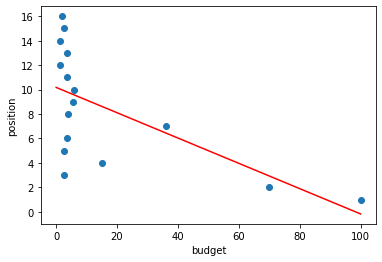

In [191]:
# plot the regression line against the points

xfit = np.array([0,max(x)])

# newaxis gives xfit the shape of a matrix
yfit = model.predict(xfit[:,np.newaxis])

# the building of the plot starts by defining an axes
# then you put the scatter plot on the axes
# you set a number of things on the axes
# etc.
# the build of the plot is axes centered
ax=plt.axes()
ax.scatter(x, y)
ax.set_ylabel('position')
ax.set_xlabel('budget')
ax.plot(xfit, yfit,color='red');

In [192]:
# Did we find a useful approximation?
# Let's try some test cases

xtest=np.array([0.1,1,5,10,100])
Xtest=xtest[:,np.newaxis] # Xtest is a matrix now
ypred = model.predict(Xtest)
ypred

array([10.16403754, 10.07087214,  9.6568037 ,  9.13921815, -0.17732172])

In [193]:
# The output is a float, so we should round to an integer
list(map(lambda predpos: int(np.round(predpos,0)),ypred))

[10, 10, 10, 9, 0]

In [197]:
# How good is the model on average?
# We will measure R2 of the model

print('R2 of the linear model is %.3f' % model.score(X,y))


R2 of the linear model is 0.390


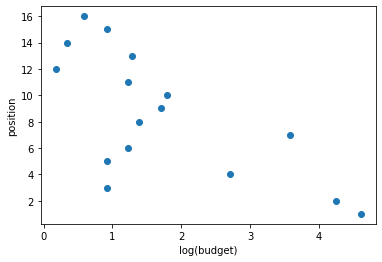

In [162]:
# We can transform the variable to improve learning
# We can now 'see' a more clear relation

logbudget=np.array(np.log(league.budget))

ax=plt.axes()
ax.scatter(logbudget,league.position)
ax.set(xlabel='log(budget)')
ax.set(ylabel='position'); # this semicolon supresses the output of this command. Try without

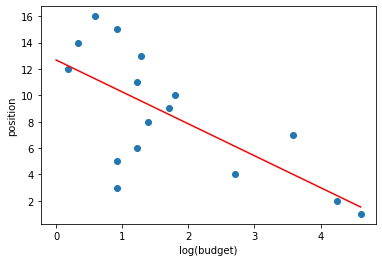

In [195]:
Xlog=logbudget[:,np.newaxis] # newaxis gives x the shape of a matrix. Try without

modellog = LinearRegression(fit_intercept=True)
modellog.fit(Xlog,y)

xfit = np.array([0,max(logbudget)])
Xfit = xfit[:,np.newaxis]
# newaxis gives xfit the shape of a matrix
yfit = modellog.predict(Xfit)

# the building of the plot starts by defining an axes
# then you put the scatter plot on the axes
# you set a number of things on the axes
# etc.
# the build of the plot is axes centered
ax=plt.axes()
ax.scatter(logbudget, y)
ax.set_ylabel('position')
ax.set_xlabel('log(budget)')
ax.plot(xfit, yfit,color='red');

In [196]:
# Pretty print model with log transform

beta1=modellog.coef_[0]
beta0=modellog.intercept_

print('position =',beta0,'+',beta1,'*log(budget)')

position = 12.678175123071064 + -2.421080156219609 *log(budget)


In [199]:
print('R2 of the linear model with the log transform is %.3f' % modellog.score(Xlog,y))

R2 of the linear model with the log transform is 0.474


The log transform of the input variable *budget* improved the R2 of the model.

In [203]:
# Did we find a useful approximation?
# Let's try some test cases

xtest=np.log(np.array([0.1,1,5,10,100]))
Xtest=xtest[:,np.newaxis] # Xtest is a matrix now
ypred = modellog.predict(Xtest)
ypred

list(map(lambda predpos: int(np.round(predpos,0)),ypred))

[18, 13, 9, 7, 2]

Predictions now *seem* more accurate.